# Machine Learning on Text: Clustering Assignment

In [0]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Ingest the company_profiles data set into a corpus.

In [0]:
DOC_PATTERN = r'.*\.txt'
corpus = PlaintextCorpusReader('company_profiles', DOC_PATTERN)

In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('gutenberg')

from nltk.corpus import gutenberg

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


### Create a list of documents by extracting the raw text for each fileid in the corpus.

In [0]:
docs = [gutenberg.raw(fileid) for fileid in gutenberg.fileids()]

In [0]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]

### Preprocess the documents, including the steps below.

- Word tokenize the document.
- Lowercase all tokens.
- Lemmatize and stem the tokens.
- Remove stop words and punctuation.

In [0]:
def preprocess(docs):
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer('english')
    preprocessed = []
    
    for doc in docs:
        tokenized = word_tokenize(doc)

        cleaned = [stemmer.stem(lemmatizer.lemmatize(token.lower())) 
                   for token in tokenized 
                   if not token.lower() in stopwords.words('english') 
                   if token.isalpha()]

        untokenized = " ".join(cleaned)
        preprocessed.append(untokenized)
        
    return preprocessed

preprocessed = preprocess(docs)

### TF-IDF vectorize the preprocessed documents.

In [0]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(preprocessed)

vectorized = pd.DataFrame(vectors.toarray(), 
                          columns=vectorizer.get_feature_names())

In [0]:
vectorized

aaron  aaronit        ab  ...  zurishaddai    zuyder   zuzim
0   0.000000   0.0000  0.000000  ...     0.000000  0.000000  0.0000
1   0.000000   0.0000  0.000000  ...     0.000000  0.000000  0.0000
2   0.000000   0.0000  0.000000  ...     0.000000  0.000000  0.0000
3   0.030433   0.0002  0.000000  ...     0.000501  0.000000  0.0001
4   0.000000   0.0000  0.000000  ...     0.000000  0.000000  0.0000
5   0.000000   0.0000  0.000000  ...     0.000000  0.000000  0.0000
6   0.000000   0.0000  0.000000  ...     0.000000  0.000000  0.0000
7   0.000000   0.0000  0.000000  ...     0.000000  0.000000  0.0000
8   0.000000   0.0000  0.000000  ...     0.000000  0.000000  0.0000
9   0.000000   0.0000  0.000000  ...     0.000000  0.000000  0.0000
10  0.000000   0.0000  0.000000  ...     0.000000  0.000000  0.0000
11  0.000000   0.0000  0.000845  ...     0.000000  0.000000  0.0000
12  0.000000   0.0000  0.000000  ...     0.000000  0.000000  0.0000
13  0.002870   0.0000  0.000000  ...     0.000000  0.000000  0.0000
14  0.000000   0.0000  0.000000  ...     0.000000  0.000000  0.0000
15  0.000000   0.0000  0.000000  ...     0.000000  0.000000  0.0000
16  0.000000   0.0000  0.000000  ...     0.000000  0.000000  0.0000
17  0.000000   0.0000  0.000000  ...     0.000000  0.001418  0.0000

[18 rows x 24366 columns]

### Determine the optimal number of clusters using the Yellowbrick library's KElbow Visualizer and a KMeans clustering algorithm.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fabc427f7f0>,
                 k=None, metric=None, model=None, timings=True)

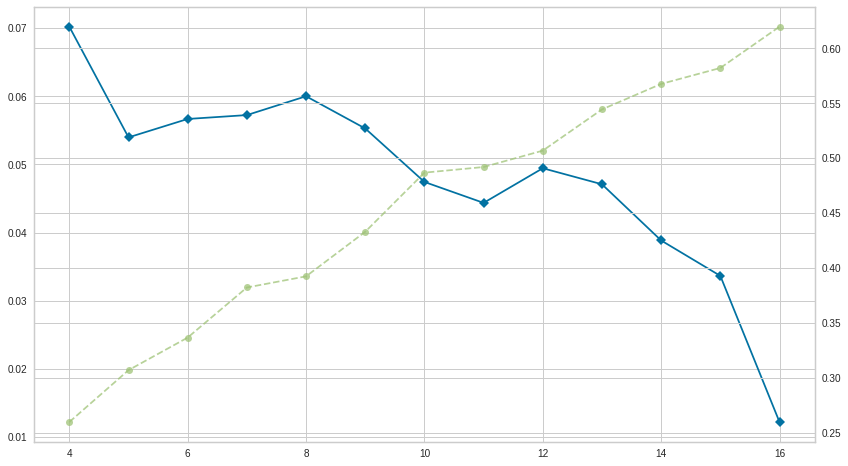

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,17), metric='silhouette')

visualizer.fit(vectorized)

### Perform K-Means Clustering using the optimal number of clusters determine in the previous step.

In [0]:
model = KMeans(n_clusters=8)
clusters = model.fit_predict(vectorized)

### Perform Agglomerative Clustering using the same number of clusters.

In [0]:
model = AgglomerativeClustering(n_clusters=8)
clusters = model.fit_predict(vectorized)

### Choose one of the three topic modeling approaches covered. Cluster into the optimal number of clusters and extract 5 keywords that represent the documents in each cluster.

In [0]:
from sklearn.decomposition import NMF

num_keywords = 5
num_topics = 8

vectorizer = TfidfVectorizer()
model = NMF(n_components=num_topics)

vectorized = vectorizer.fit_transform(preprocessed)
model.fit_transform(vectorized)

results = [[(vectorizer.get_feature_names()[i], topic[i]) 
            for i in topic.argsort()[:-num_keywords - 1:-1]] 
           for topic in model.components_]

topics = [[x[0] for x in i] for i in results]
topics

[['said', 'littl', 'one', 'whale', 'like'],
 ['thee', 'thou', 'thi', 'shall', 'unto'],
 ['haue', 'macb', 'ham', 'bru', 'vpon'],
 ['elinor', 'could', 'emma', 'would', 'mariann'],
 ['buster', 'joe', 'littl', 'blacki', 'farmer'],
 ['alic', 'said', 'littl', 'gryphon', 'duchess'],
 ['syme', 'said', 'gregori', 'professor', 'man'],
 ['turnbul', 'macian', 'said', 'evan', 'like']]